In [1]:
import pandas as pd
import networkx as nx

In [2]:
import matplotlib.pyplot as plt

In [3]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import powerlaw

In [5]:
df = pd.read_excel("/content/weighted degree.xlsx")

In [6]:
df.head()

,Country,Gname,Weight
0,Zimbabwe,Zimbabwe African Nationalist Union (ZANU),13.0
1,Zimbabwe,Mozambique National Resistance Movement (MNR),8.0
2,Zimbabwe,Supporters of Joshua Nkomo,8.0
3,Zimbabwe,Movement for Democratic Change (MDC),3.0
4,Zimbabwe,Zimbabwe African People's Union,3.0


In [7]:
G = nx.from_pandas_edgelist(df, "Country", "Gname", create_using=nx.Graph())

Text(0.5, 1.0, 'CCDF FOR TERRORIST GRAPH')

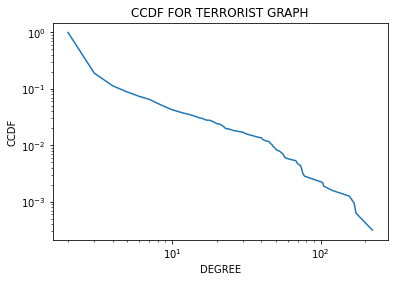

In [8]:
Gdeg = [G.degree(n) + 1 for n in G.nodes]
powerlaw.plot_ccdf(Gdeg)
plt.xlabel("DEGREE")
plt.ylabel("CCDF")
plt.title("CCDF FOR TERRORIST GRAPH")

In [9]:
fit = powerlaw.Fit(Gdeg)

Calculating best minimal value for power law fit


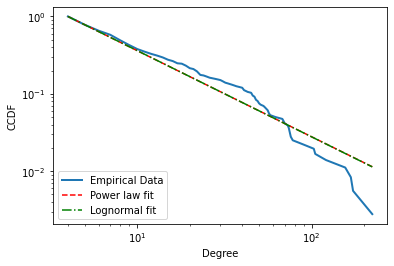

In [17]:
fig = fit.plot_ccdf(linewidth=2, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='-.', label='Lognormal fit')

fig.set_ylabel(u"CCDF")
fig.set_xlabel("Degree")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

In [11]:
R, p = fit.distribution_compare('power_law', 'lognormal')

In [12]:
R

0.004002248444848089

In [13]:
p

0.8516042146283721

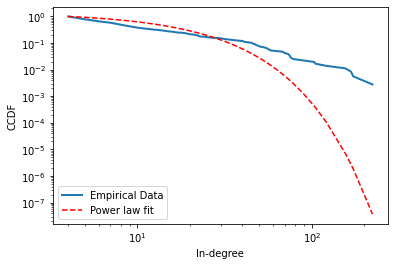

In [14]:
fig = fit.plot_ccdf(linewidth=2, label='Empirical Data')
fit.exponential.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')

fig.set_ylabel(u"CCDF")
fig.set_xlabel("In-degree")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

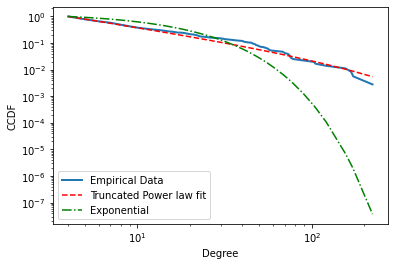

In [16]:
fig = fit.plot_ccdf(linewidth=2, label='Empirical Data')
fit.truncated_power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Truncated Power law fit')
fit.exponential.plot_ccdf(ax=fig, color='g', linestyle='-.', label='Exponential')

fig.set_ylabel(u"CCDF")
fig.set_xlabel("Degree")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

In [18]:
R, p = fit.distribution_compare('power_law', 'truncated_power_law')

Assuming nested distributions


In [19]:
R

-1.5060268639851468

In [20]:
p

0.08264751562332529

In [22]:
R, p = fit.distribution_compare('lognormal', 'truncated_power_law')
print(R,p)

-1.510029112430014 0.11145614589189651


In [23]:
R, p = fit.distribution_compare('exponential', 'truncated_power_law')
print(R,p)

-134.59023359326468 6.083924031868098e-12
